In [181]:
import pandas as pd
import numpy as np

from scipy.stats import shapiro, levene, f_oneway
import scikit_posthocs as sp

import matplotlib.pyplot as plt

df = pd.read_csv('./static/result.csv')
df.head()

length = [*range(1,25)]

replacement_ans = {
    "Agree": 1,
    "Unsure": 0,
    "Disagree": -1,
}

replacement_conf = {
    "7-Extremely confident": 7,
    "6-Very confident": 6,
    "5-Somewhat confident": 5,
    "4-Neutral": 4,
    "3-Somewhat lacking confidence": 3,
    "2-Very lacking confidence": 2,
    "1-Extremely lacking confidence": 1,
}

condition = [
    "control",
    "ai-edited-image",
    "ai-edited-video",
    "ai-edited-image-video",
]

induced_imgs = [1,2,3,4,9,10,11,12,17,18,19,20]
non_induced_imgs = [5,6,7,8,13,14,15,16,21,22,23,24]

correct_is_true = [6,7,9,10,14,18,21,23]
correct_is_false = [1,2,3,4,5,8,11,12,13,15,16,17,19,20,22,24]

# get filtered columns
filtered_cols = [[f"{i}_false_memories_ans", f"{i}_false_memories_conf"] for i in length]
filtered_cols = [i for sublist in filtered_cols for i in sublist]

# remove headers and replace values
head = df.head(1)
df = df[2:][['condition', *filtered_cols]]
df.replace(replacement_ans, inplace=True)
df.replace(replacement_conf, inplace=True)

result = df.copy()
result = result[['condition'] + [f"{i}_false_memories_ans" for i in length]  + [f"{i}_false_memories_conf" for i in length]]

# convert raw answer to score (1 -> correct, 0 -> unsure, -1 -> wrong)
for i in length:
    multiplier = 1 if i in correct_is_true else -1
    result[f"{i}_false_memories_ans"] *= multiplier

/var/folders/bw/64y3yr9n6v50fgm86wtx236c0000gn/T/ipykernel_57860/2451076264.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacement_ans, inplace=True)
/var/folders/bw/64y3yr9n6v50fgm86wtx236c0000gn/T/ipykernel_57860/2451076264.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacement_conf, inplace=True)


In [182]:
# Generate Raw Tables

def summarize(cat, df):
    # get sum
    df['overall'] = df[[f"{i}_false_memories_ans" for i in [*range(1,25)]]].sum(axis=1)
    df['induced'] = df[[f"{i}_false_memories_ans" for i in [*range(1,25)] if i in induced_imgs]].sum(axis=1)
    df['non induced'] = df[[f"{i}_false_memories_ans" for i in [*range(1,25) ] if i in non_induced_imgs]].sum(axis=1)

    # get percentages in % in two decimals
    df['overall %'] = (df['overall'] / 24) * 100
    df['induced %'] = (df['induced'] / 12) * 100
    df['non induced %'] = (df['non induced'] / 12) * 100

    # filter
    df = df[['condition', 'overall', 'overall %', 'induced', 'induced %', 'non induced', 'non induced %']]

    print(cat)
    display(df.groupby('condition').mean().round(2))
    
true_memories = result.copy().replace(-1,0)
false_memories = result.copy().replace(1,0).replace(-1,1)
unsure_memories = result.copy().replace(1,-1).replace(0,1).replace(-1,0)

print("AMOUNT")
summarize('Non False Memories', true_memories)
summarize('Unsure Memories', unsure_memories)
summarize('False Memories', false_memories)

def confidence(cat, result, raw):
    print(cat)
    # display(result)
    # display(raw[['condition', *[f"{i}_false_memories_conf" for i in length]]])
    
    # get confidence: for each row {i}_confidence = result[{i}_false_memories_ans] * raw[{i}_false_memories_conf]
    for i in length:
        result[f"{i}_conf"] = result[f"{i}_false_memories_ans"] * raw[f"{i}_false_memories_conf"]
    
    result['overall'] = result[[f"{i}_conf" for i in length]].sum(axis=1) / 14
    result['induced'] = result[[f"{i}_conf" for i in length if i in induced_imgs]].sum(axis=1) / 7
    result['non induced'] = result[[f"{i}_conf" for i in length if i in non_induced_imgs]].sum(axis=1) / 7

    result = result[['condition', 'overall', 'induced', 'non induced']]
    display(result.groupby('condition').mean().round(2))
        
true_memories = result.copy().replace(-1,0)
false_memories = result.copy().replace(1,0).replace(-1,1)

print("\nCONFIDENCE")
confidence("Non False Memories", true_memories, df)
confidence("False Memories", false_memories, df)

AMOUNT
Non False Memories


,overall,overall %,induced,induced %,non induced,non induced %
condition,,,,,,
ai-edited-image,13.65,56.86,6.47,53.92,7.18,59.80
ai-edited-image-video,12.10,50.42,5.26,43.83,6.84,57.00
ai-edited-video,13.82,57.58,6.98,58.17,6.84,57.00
control,15.06,62.76,7.94,66.16,7.12,59.35


Unsure Memories


,overall,overall %,induced,induced %,non induced,non induced %
condition,,,,,,
ai-edited-image,3.61,15.03,1.76,14.71,1.84,15.36
ai-edited-image-video,4.58,19.08,2.10,17.50,2.48,20.67
ai-edited-video,4.28,17.83,2.18,18.17,2.10,17.50
control,3.96,16.50,1.80,14.97,2.16,18.03


False Memories


,overall,overall %,induced,induced %,non induced,non induced %
condition,,,,,,
ai-edited-image,6.75,28.10,3.76,31.37,2.98,24.84
ai-edited-image-video,7.32,30.50,4.64,38.67,2.68,22.33
ai-edited-video,5.90,24.58,2.84,23.67,3.06,25.50
control,4.98,20.75,2.27,18.88,2.71,22.62



CONFIDENCE
Non False Memories


,overall,induced,non induced
condition,,,
ai-edited-image,5.21,4.96,5.47
ai-edited-image-video,4.95,4.23,5.67
ai-edited-video,5.64,5.71,5.56
control,5.98,6.32,5.64


False Memories


,overall,induced,non induced
condition,,,
ai-edited-image,2.42,2.70,2.13
ai-edited-image-video,2.94,3.80,2.09
ai-edited-video,2.22,2.18,2.27
control,1.86,1.74,1.97


In [183]:
score = pd.DataFrame()

# for each row in df, multiply answer by confidence
for i in length:
    multiplier = -1 if i in correct_is_false else 1
    score['condition'] = df['condition']
    score[f"{i}_false_memories_score"] = multiplier * df[f"{i}_false_memories_ans"] * df[f"{i}_false_memories_conf"]
    score[f"{i}_false_memories_no"] = multiplier * df[f"{i}_false_memories_ans"]

# sum scores    
score['overall'] = score[[f"{i}_false_memories_score" for i in length]].sum(axis=1)
score['induced'] = score[[f"{i}_false_memories_no" for i in length if i in induced_imgs]].sum(axis=1)
score['weighted induced'] = score[[f"{i}_false_memories_score" for i in length if i in induced_imgs]].sum(axis=1)
score['non induced'] = score[[f"{i}_false_memories_no" for i in length if i in non_induced_imgs]].sum(axis=1)
score['weighted non induced'] = score[[f"{i}_false_memories_score" for i in length if i in non_induced_imgs]].sum(axis=1)

cond = ['condition', 'overall', 'induced', 'weighted induced', 'non induced', 'weighted non induced']
# score = score[cond + [f"{i}_false_memories_score" for i in length]]
score = score[cond]

# group by condition and average
print(f"score: 1 -> correct (true memory), 0 -> unsure, -1 if wrong (false memory)")
print("weight score: score {1,0,-1} * confidence [1,7] (how strong the memory is)")
print("higher score means less false memory")
score.groupby('condition').mean().round(2)

score: 1 -> correct (true memory), 0 -> unsure, -1 if wrong (false memory)
weight score: score {1,0,-1} * confidence [1,7] (how strong the memory is)
higher score means less false memory


,overall,induced,weighted induced,non induced,weighted non induced
condition,,,,,
ai-edited-image,39.16,2.71,15.80,4.20,23.35
ai-edited-image-video,28.10,0.62,3.04,4.16,25.06
ai-edited-video,47.80,4.14,24.76,3.78,23.04
control,57.76,5.67,32.06,4.41,25.69


In [184]:
# convert score to list based on 'condition'
data = []
conditions = ['control', 'ai-edited-video', 'ai-edited-image', 'ai-edited-image-video']
for c in conditions:
    s = score[score['condition'] == c]['weighted induced']
    data.append(s.tolist())

print("SHAPIRO-WILK")
for i in range(4):
    print(conditions[i], "=>", shapiro(data[i]))

print("\nLEVENE", "=>", levene(*data))

print("ANOVA", "=>", f_oneway(*data))

print("\nTUKEY (weighted score)")
print(sp.posthoc_tukey(data))

# control - 1, ai-edited-video - 2, ai-edited-image - 3, ai-edited-image-video - 4

SHAPIRO-WILK
control => ShapiroResult(statistic=np.float64(0.9608693154405361), pvalue=np.float64(0.10287465901514571))
ai-edited-video => ShapiroResult(statistic=np.float64(0.9777998356545977), pvalue=np.float64(0.4633678705301146))
ai-edited-image => ShapiroResult(statistic=np.float64(0.9777820369607433), pvalue=np.float64(0.4494322220405031))
ai-edited-image-video => ShapiroResult(statistic=np.float64(0.9677447492422139), pvalue=np.float64(0.18709202425588012))

LEVENE => LeveneResult(statistic=np.float64(0.5001481412826619), pvalue=np.float64(0.6826089663897446))
ANOVA => F_onewayResult(statistic=np.float64(14.576926195005388), pvalue=np.float64(1.3120115769723279e-08))

TUKEY (weighted score)
          1         2         3         4
1  1.000000  0.396745  0.002962  0.001000
2  0.396745  1.000000  0.210558  0.001000
3  0.002962  0.210558  1.000000  0.030136
4  0.001000  0.001000  0.030136  1.000000


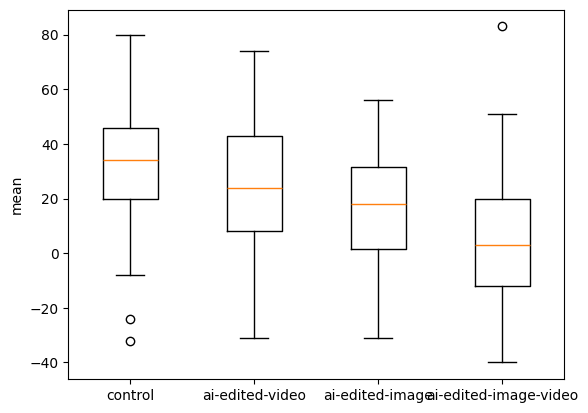

In [185]:
fig, ax = plt.subplots(1, 1)
ax.boxplot(data)
ax.set_xticklabels(conditions) 
ax.set_ylabel("mean") 
plt.show()

In [186]:
# Prepare data for plotting according to the specified order and calculate mean and standard error
means = []
errors = []
sds = []
condition_dict = {
    'control': data[0],
    'ai-edited-video': data[1],
    'ai-edited-image': data[2],
    'ai-edited-image-video': data[3]
}

for condition in conditions:
    if condition in condition_dict:
        values = condition_dict[condition]
        mean = np.mean(values)
        # Calculate the standard error as the error bar (standard deviation divided by the square root of the sample size)
        std = np.std(values)
        error = np.std(values) / np.sqrt(len(values))
        means.append(mean)
        sds.append(std)
        errors.append(error)
        
# means, errors, sds

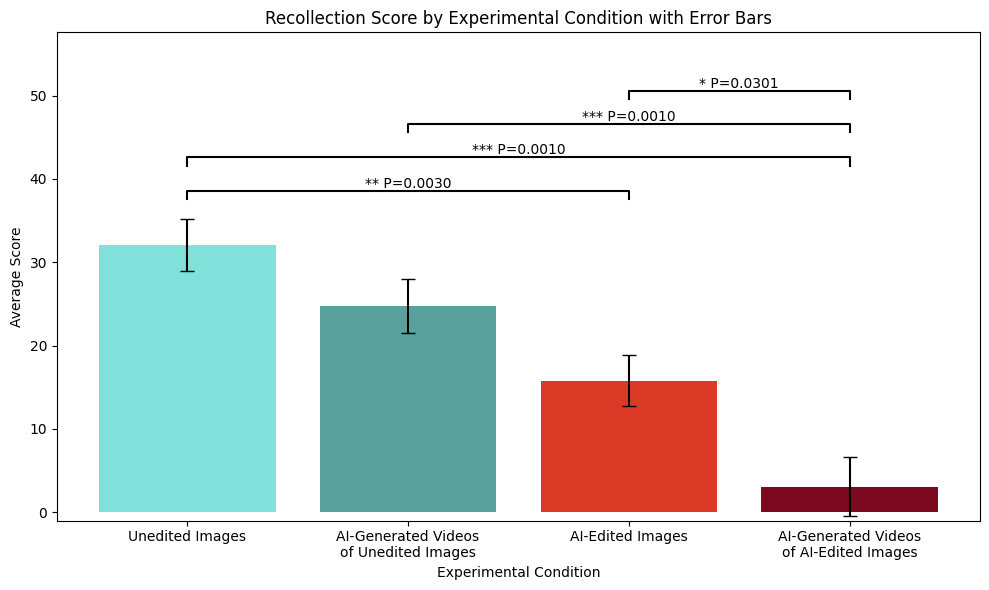

In [187]:
ordered_labels = ['Unedited Images', 'AI-Generated Videos\nof Unedited Images', 'AI-Edited Images', 'AI-Generated Videos\nof AI-Edited Images']
colors = ["#7FE1DA", "#5AA09C", "#DA3A26", "#7B091F"]

# X positions
x_pos = np.arange(len(conditions))

# *    P ≤ 0.05
# **   P ≤ 0.01
# ***  P ≤ 0.001
# **** P ≤ 0.0001

#           1         2         3         4
# 1  1.000000  0.396745  0.002962  0.001000
# 2  0.396745  1.000000  0.210558  0.001000
# 3  0.002962  0.210558  1.000000  0.030136
# 4  0.001000  0.001000  0.030136  1.000000

# Significance values (p-values) for the significance markers
significance_values = [
    ((0, 2), '** P=0.0030'),
    ((0, 3), '*** P=0.0010'),
    ((1, 3), '*** P=0.0010'),
    ((2, 3), '* P=0.0301'),
]

# Creating the bar plot with error bars
plt.figure(figsize=(10, 6))
bars = plt.bar(x_pos, means, yerr=errors, capsize=5, color=colors)
plt.title('Recollection Score by Experimental Condition with Error Bars')
plt.ylabel('Average Score')
plt.xlabel('Experimental Condition')
plt.xticks(x_pos, ordered_labels)

# Adding significance markers with p-values, separate and not overlapping
y_base_offset = 2  # Base vertical offset for significance lines
y_increment = 4  # Increment for each subsequent significance marker

# Initialize the first y position above the highest bar
current_y_position = max(means) + max(errors) + y_base_offset

for idx, ((i, j), label) in enumerate(significance_values):
    x1, x2 = x_pos[i], x_pos[j]
    # print("{1} and {2} with id: {0}".format(idx, x1, x2))
    y = current_y_position
    h, col = 1, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1 + x2) * 0.5, y + h, label, ha='center', va='bottom', color=col)
    current_y_position += y_increment  # Update the y position for the next marker

# Adjust plot limits to make space for significance markers
plt.ylim(-1, current_y_position + y_increment)

# Improve layout
plt.tight_layout()

#plt.savefig('foo.png', bbox_inches='tight')

# Show the plot
plt.show()

In [188]:
result_induced = result[['condition', *[f"{i}_false_memories_ans" for i in length if i in induced_imgs]]]
conf_induced = result[['condition', *[f"{i}_false_memories_conf" for i in length if i in induced_imgs]]]

memories = {
    'control': [],
    'ai-edited-video': [],
    'ai-edited-image': [],
    'ai-edited-image-video': []
}

conf = {
    'control': [],
    'ai-edited-video': [],
    'ai-edited-image': [],
    'ai-edited-image-video': []
}

def tally(l, el):
    return len([*filter(lambda x: x == el, l)])

for i in range(len(result_induced)):
    line = result_induced.iloc[i].tolist()
    true, unsure, false = tally(line, 1), tally(line, 0), tally(line, -1)
    memories[line[0]].append([true, unsure, false])
    
    line_conf = conf_induced.iloc[i].tolist()
    tally_conf = [0,0,0]
    for j in range(1, len(line)):
        if(line[j] == 1):
            tally_conf[0] += int(line_conf[j])
        elif (line[j] == 0):
            tally_conf[1] += int(line_conf[j])
        elif (line[j] == -1):
            tally_conf[2] += int(line_conf[j])

    conf[line[0]].append([i / 12 for i in tally_conf])
    
# map each entry into a triplet of tally information
# # -> [# of non-false, # of unsure, # of false]
# Conf -> [Avg. conf. of non-false, Avg. conf. of unsure, Avg. conf. of false]

In [189]:
print("SHAPIRO-WILK")
for c in conditions:
    print(c, "=>", shapiro(memories[c]))

print("\nLEVENE", "=>", levene(*[memories[c] for c in conditions]))

print(f_oneway(memories['control'], memories['ai-edited-video'], memories['ai-edited-image'], memories['ai-edited-image-video']))
print(f_oneway(conf['control'], conf['ai-edited-video'], conf['ai-edited-image'], conf['ai-edited-image-video']))

print("\nTUKEY (# of recalled memories)")
for i in range(3):
    print(['non-false', 'unsure', 'false'][i])
    print("# accuracy\n", sp.posthoc_tukey([[el[i] for el in memories[c]] for c in conditions]) , "\nconf.\n",
          sp.posthoc_tukey([[el[i] for el in conf[c]] for c in conditions]))
    print()

SHAPIRO-WILK
control => ShapiroResult(statistic=np.float64(0.9016281984881496), pvalue=np.float64(2.1116315786779705e-08))
ai-edited-video => ShapiroResult(statistic=np.float64(0.9344171140260434), pvalue=np.float64(2.0413341839817754e-06))
ai-edited-image => ShapiroResult(statistic=np.float64(0.9391185919330263), pvalue=np.float64(3.703913862670961e-06))
ai-edited-image-video => ShapiroResult(statistic=np.float64(0.9611916496892737), pvalue=np.float64(0.00031581908235005804))

LEVENE => LeveneResult(statistic=array([0.51353435, 1.37877711, 1.93744187]), pvalue=array([0.67341721, 0.25048281, 0.12484058]))
F_onewayResult(statistic=array([11.29910421,  0.50568642, 12.95450353]), pvalue=array([7.19423901e-07, 6.78798239e-01, 9.35251465e-08]))
F_onewayResult(statistic=array([ 8.49570043,  0.53692024, 13.44256064]), pvalue=array([2.47253483e-05, 6.57518635e-01, 5.16093516e-08]))

TUKEY (# of recalled memories)
non-false
# accuracy
           1         2         3         4
1  1.000000  0.17

In [217]:
means = []
errors = []
sds = []

for condition in conditions:
    if condition in memories:
        values = memories[condition]
        el1, el2, el3 = [el[0] for el in values], [el[1] for el in values], [el[2] for el in values]
        mean = [np.mean(el1), np.mean(el2), np.mean(el3)]
        
        # Calculate the standard error as the error bar (standard deviation divided by the square root of the sample size)
        std = [np.std(el1), np.std(el2), np.std(el3)]
        error = [std[0] / np.sqrt(len(el1)), std[1] / np.sqrt(len(el2)), std[2] / np.sqrt(len(el3))]

        means.append(mean)
        sds.append(std)
        errors.append(error)
        
# each var -> 4 conditions x [true, unsure, false]
# means, errors, sds

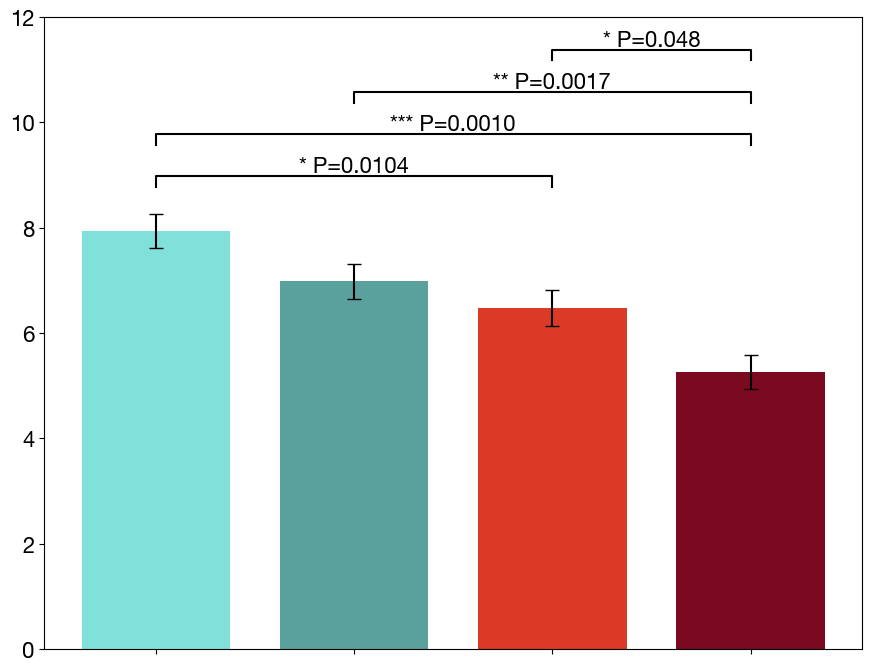

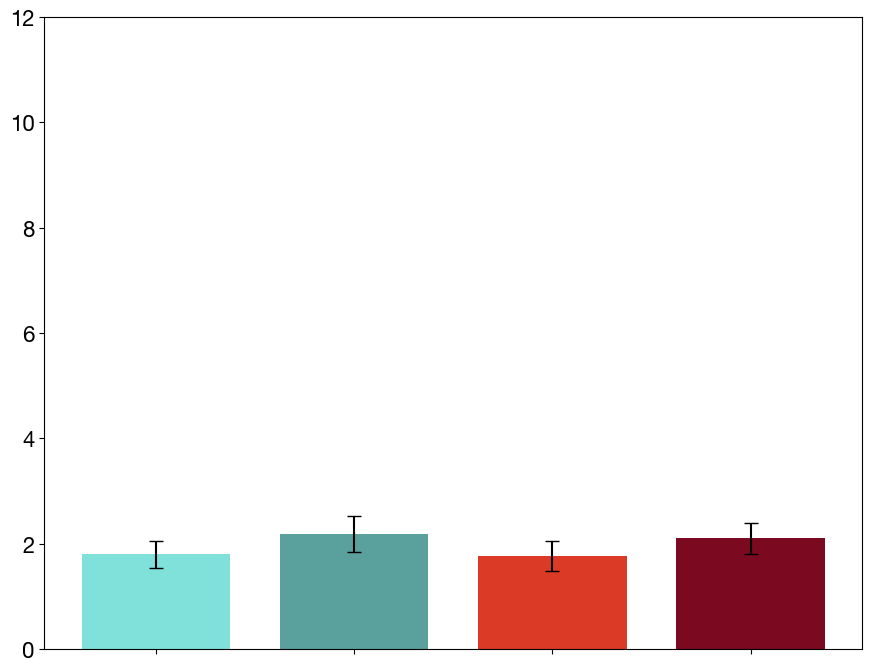

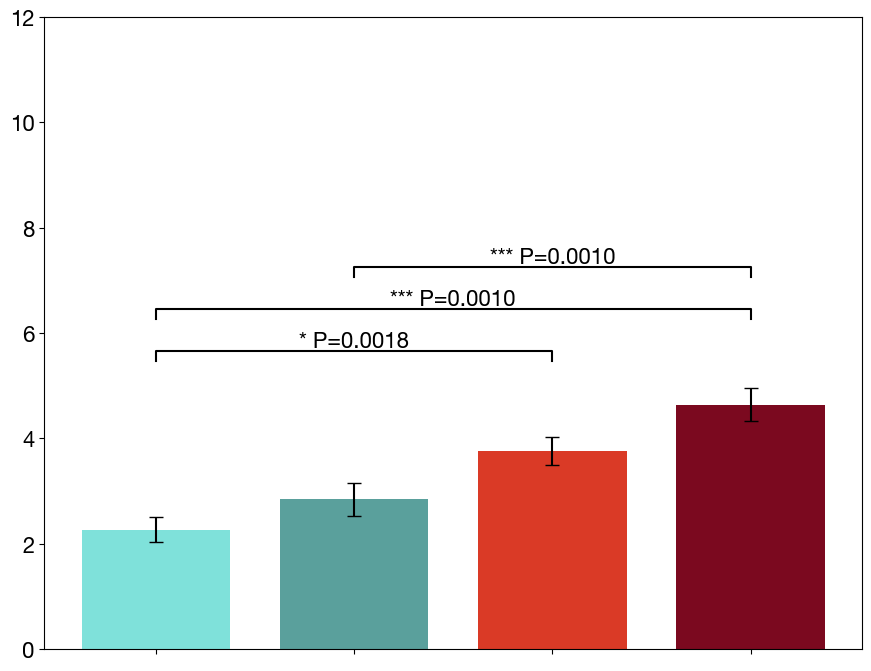

In [221]:
import matplotlib

# ordered_labels = ['Unedited Images', 'AI-Generated Videos\nof Unedited Images', 'AI-Edited Images', 'AI-Generated Videos\nof AI-Edited Images']
ordered_labels = ['', '', '', '']

# X positions
x_pos = np.arange(len(conditions))

#            1         2         3         4
# 1  1.000000  0.176505  0.010405  0.001000
# 2  0.176505  1.000000  0.671078  0.001700
# 3  0.010405  0.671078  1.000000  0.048483
# 4  0.001000  0.001700  0.048483  1.000000

#            1         2         3         4
# 1  1.000000  0.773965  0.900000  0.880243
# 2  0.773965  1.000000  0.726956  0.900000
# 3  0.900000  0.726956  1.000000  0.834302
# 4  0.880243  0.900000  0.834302  1.000000

#            1         2         3         4
# 1  1.000000  0.501394  0.001785  0.001000
# 2  0.501394  1.000000  0.107982  0.001000
# 3  0.001785  0.107982  1.000000  0.140631
# 4  0.001000  0.001000  0.140631  1.000000

# Significance values (p-values) for the significance markers
significance_values = [[
    ((0, 2), '* P=0.0104'),
    ((0, 3), '*** P=0.0010'),
    ((1, 3), '** P=0.0017'),
    ((2, 3), '* P=0.048'),
], [], [
    ((0, 2), '* P=0.0018'),
    ((0, 3), '*** P=0.0010'),
    ((1, 3), '*** P=0.0010'),
]]

mark = ['Non-false', 'Uncertain', 'False']

matplotlib.rc('font', size=16)
plt.rcParams["font.family"] = 'Helvetica Neue'

for i in range(3):
    # Creating the bar plot with error bars
    curr_means = [means[j][i] for j in range(4)]
    curr_errors = [errors[j][i] for j in range(4)]
    
    plt.figure(figsize=(9, 7))
    bars = plt.bar(x_pos, curr_means, yerr=curr_errors, capsize=5, color=colors, width=0.75)
    # plt.title(f'Number of {mark[i]} Memories (out of 12)\nby Experimental Condition with Error Bars')
    # plt.ylabel(f'Number of {mark[i]} Memories')
    # plt.xlabel('Experimental Condition')
    plt.xticks(x_pos, ordered_labels)

    # Adding significance markers with p-values, separate and not overlapping
    y_base_offset = 0.5  # Base vertical offset for significance lines
    y_increment = 0.8  # Increment for each subsequent significance marker

    # Initialize the first y position above the highest bar
    current_y_position = max(curr_means) + max(curr_errors) + y_base_offset

    for idx, ((i, j), label) in enumerate(significance_values[i]):
        x1, x2 = x_pos[i], x_pos[j]
        # print("{1} and {2} with id: {0}".format(idx, x1, x2))
        y = current_y_position
        h, col = 0.2, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1 + x2) * 0.5, y + h, label, ha='center', va='bottom', color=col)
        current_y_position += y_increment  # Update the y position for the next marker

    # Adjust plot limits to make space for significance markers
    plt.ylim(0, 12) # current_y_position + y_increment

    # Improve layout
    plt.tight_layout()

    #plt.savefig('foo.png', bbox_inches='tight')

    # Show the plot
    plt.show()

In [222]:
# Prepare data for plotting according to the specified order and calculate mean and standard error
means = []
errors = []
sds = []

for condition in conditions:
    if condition in conf:
        values = conf[condition]
        el1, el2, el3 = [el[0] for el in values], [el[1] for el in values], [el[2] for el in values]
        mean = [np.mean(el1), np.mean(el2), np.mean(el3)]
        # Calculate the standard error as the error bar (standard deviation divided by the square root of the sample size)
        std = [np.std(el1), np.std(el2), np.std(el3)]
        error = [std[0] / np.sqrt(len(el1)), std[1] / np.sqrt(len(el2)), std[2] / np.sqrt(len(el3))]
        means.append(mean)
        sds.append(std)
        errors.append(error)
        
# means, errors, sds

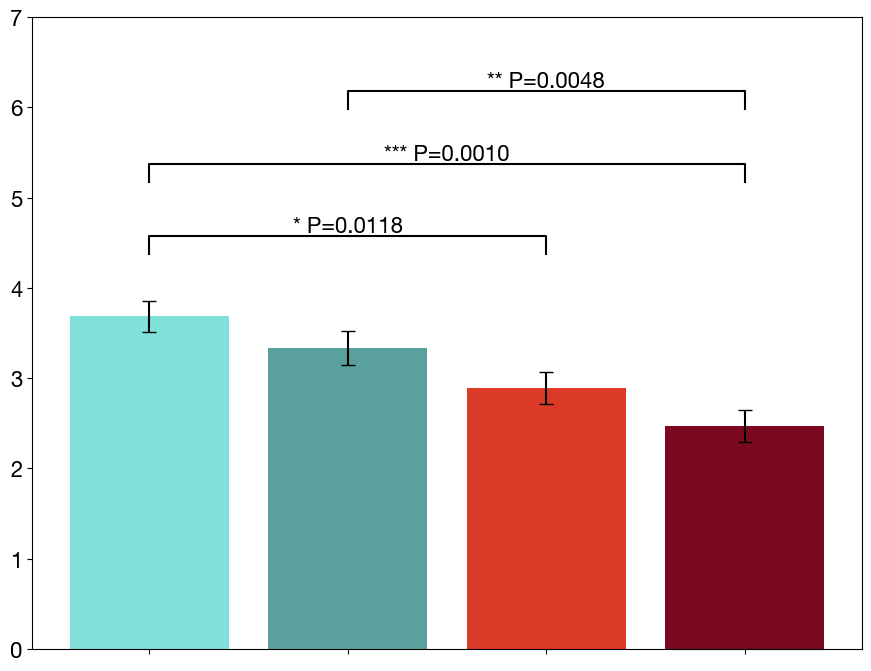

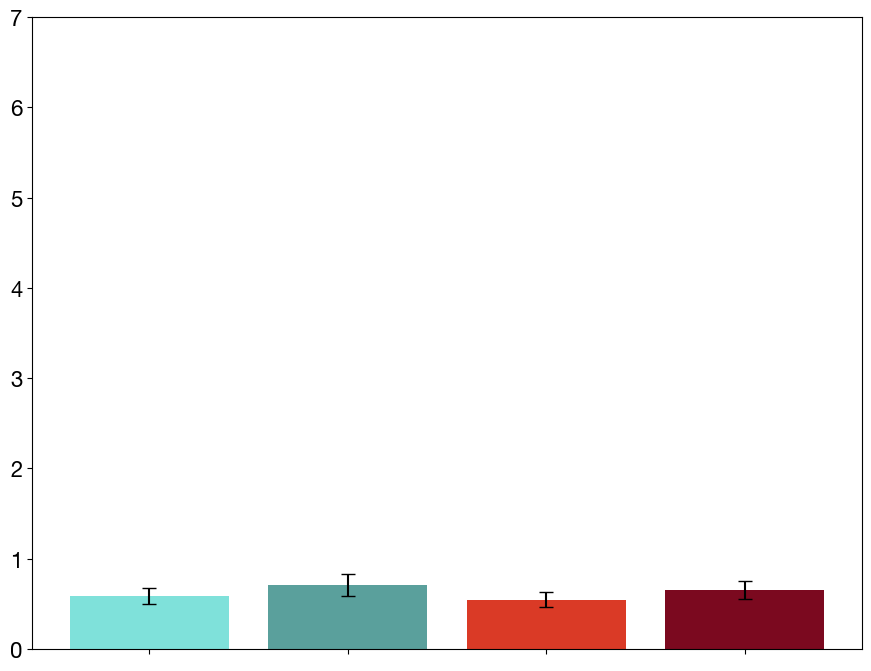

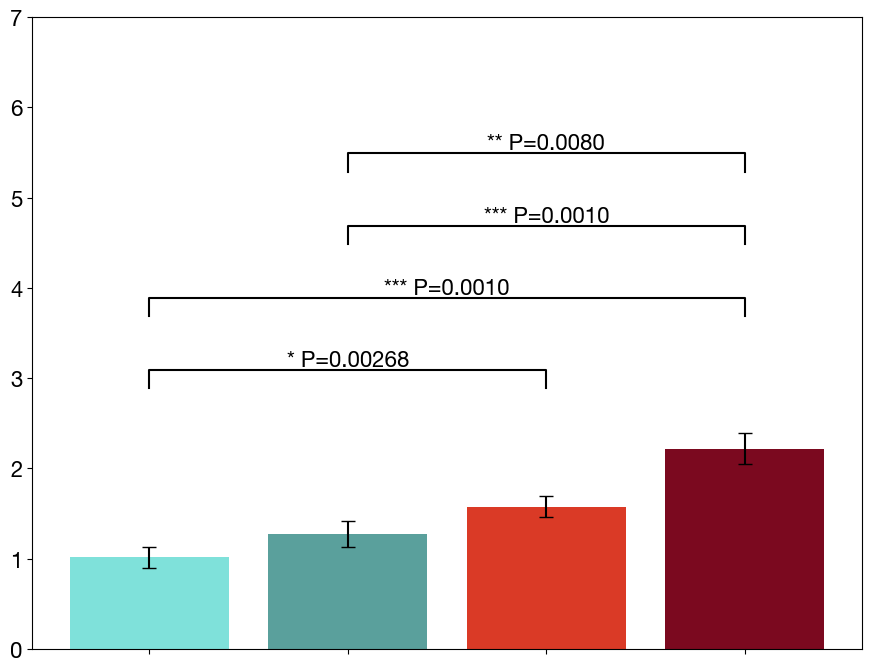

In [223]:
# ordered_labels = ['Unedited Images', 'AI-Generated Videos\nof Unedited Images', 'AI-Edited Images', 'AI-Generated Videos\nof AI-Edited Images']
ordered_labels = ['', '', '', '']
colors = ["#7FE1DA", "#5AA09C", "#DA3A26", "#7B091F"]

 # X positions
x_pos = np.arange(len(conditions))

# non-false
#           1         2         3         4
# 1  1.000000  0.516155  0.011792  0.001000
# 2  0.516155  1.000000  0.310829  0.004778
# 3  0.011792  0.310829  1.000000  0.343481
# 4  0.001000  0.004778  0.343481  1.000000

# unsure
#           1         2         3         4
# 1  1.000000  0.804508  0.900000  0.900000
# 2  0.804508  1.000000  0.629879  0.900000
# 3  0.900000  0.629879  1.000000  0.835745
# 4  0.900000  0.900000  0.835745  1.000000

# false
#           1         2         3         4
# 1  1.000000  0.568475  0.026769  0.001000
# 2  0.568475  1.000000  0.413799  0.001000
# 3  0.026769  0.413799  1.000000  0.008026
# 4  0.001000  0.001000  0.008026  1.000000

# Significance values (p-values) for the significance markers
significance_values = [[
    ((0, 2), '* P=0.0118'),
    ((0, 3), '*** P=0.0010'),
    ((1, 3), '** P=0.0048'),
], [], [
    ((0, 2), '* P=0.00268'),
    ((0, 3), '*** P=0.0010'),
    ((1, 3), '*** P=0.0010'),
    ((1, 3), '** P=0.0080'),
]]

mark = ['Non-false', 'Uncertain', 'False']

for i in range(3):
    # Creating the bar plot with error bars
    curr_means = [means[j][i] for j in range(4)]
    curr_errors = [errors[j][i] for j in range(4)]
    
    plt.figure(figsize=(9, 7))
    bars = plt.bar(x_pos, curr_means, yerr=curr_errors, capsize=5, color=colors)
    # plt.title(f'{mark[i]} Recallation Confidence\nby Experimental Condition with Error Bars')
    # plt.ylabel('Confidence Level')
    # plt.xlabel('Experimental Condition')
    plt.xticks(x_pos, ordered_labels)

    # Adding significance markers with p-values, separate and not overlapping
    y_base_offset = 0.5  # Base vertical offset for significance lines
    y_increment = 0.8  # Increment for each subsequent significance marker

    # Initialize the first y position above the highest bar
    current_y_position = max(curr_means) + max(curr_errors) + y_base_offset

    for idx, ((i, j), label) in enumerate(significance_values[i]):
        x1, x2 = x_pos[i], x_pos[j]
        # print("{1} and {2} with id: {0}".format(idx, x1, x2))
        y = current_y_position
        h, col = 0.2, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1 + x2) * 0.5, y + h, label, ha='center', va='bottom', color=col)
        current_y_position += y_increment  # Update the y position for the next marker

    # Adjust plot limits to make space for significance markers
    plt.ylim(0, 7) # current_y_position + y_increment

    # Improve layout
    plt.tight_layout()

    #plt.savefig('foo.png', bbox_inches='tight')

    # Show the plot
    plt.show()